In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
from google.colab import files
uploaded = files.upload()

dataset = pd.read_csv("Customer Churn Dataset.csv")
print(dataset.head())


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (1).csv
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No 

Replacing blanks with 0 as tenure is 0 and No total charges are recorded

In [7]:
dataset["TotalCharges"] = dataset["TotalCharges"].replace(" ", "0")
dataset["TotalCharges"] = dataset["TotalCharges"].astype("float")

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Checking for duplicated values


In [9]:
dataset["customerID"].duplicated().sum()

np.int64(0)

Convereted senior citizen values as yes or no

In [10]:
def converted(value):
  if value == 1:
    return "Yes"

  else:
    return "No"

dataset["SeniorCitizen"] = dataset["SeniorCitizen"].apply(converted)

In [11]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Down below are the plots and piechart of the churned customers

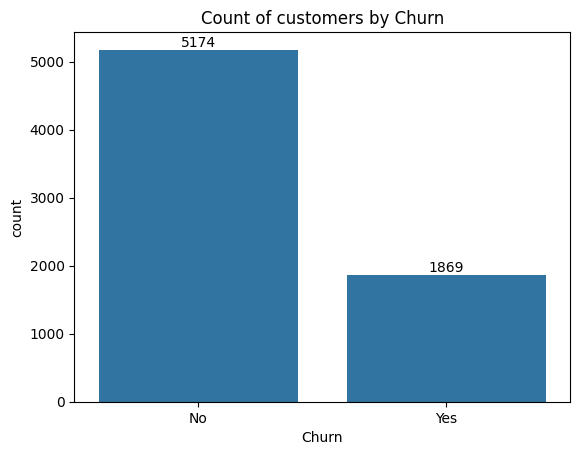

In [12]:
ax = sns.countplot(x = "Churn", data = dataset)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Churn")
plt.show()

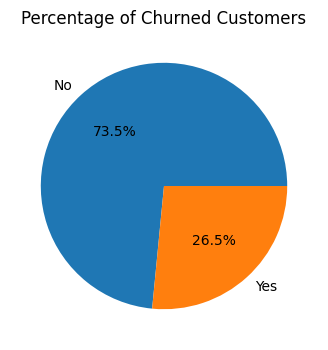

In [13]:
plt.figure(figsize = (4,4))
plt.pie(dataset["Churn"].value_counts(), labels = dataset["Churn"].value_counts().index, autopct = "%1.1f%%")
plt.title("Percentage of Churned Customers")
plt.show()

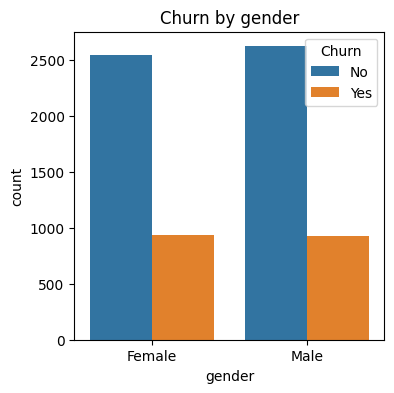

In [14]:
plt.figure(figsize = (4,4))

sns.countplot(x = "gender", data = dataset, hue = "Churn")
plt.title("Churn by gender")
plt.show()

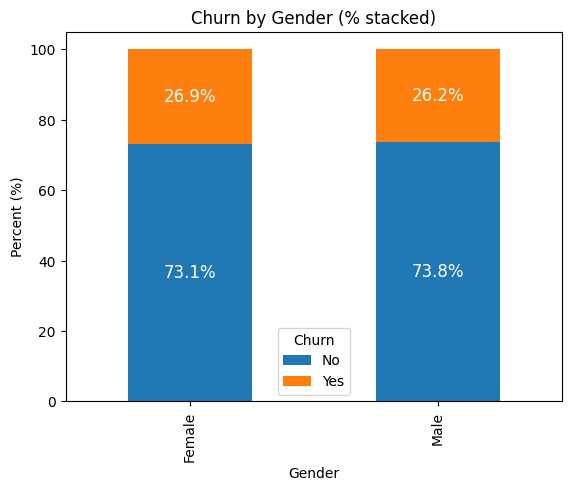

In [15]:
df = dataset

# Calculate value counts for each gender and churn, then normalize to get percentages
gender_churn = df.groupby(['gender', 'Churn']).size().unstack().fillna(0)
gender_churn_percent = gender_churn.div(gender_churn.sum(axis=1), axis=0) * 100

# Plot stacked bar
ax = gender_churn_percent.plot(kind='bar', stacked=True, color=['#1f77b4','#ff7f0e'])
plt.title("Churn by Gender (% stacked)")
plt.ylabel("Percent (%)")
plt.xlabel("Gender")

# Add percentage labels to each segment
for idx, gender in enumerate(gender_churn_percent.index):
    for churn_type in gender_churn_percent.columns:
        percent = gender_churn_percent.loc[gender, churn_type]
        if percent > 0:
            y_offset = gender_churn_percent.loc[gender].cumsum()[churn_type] - percent/2
            plt.text(idx, y_offset, f"{percent:.1f}%", ha="center", va="center", color="white", fontsize=12)

plt.legend(title="Churn")
plt.show()


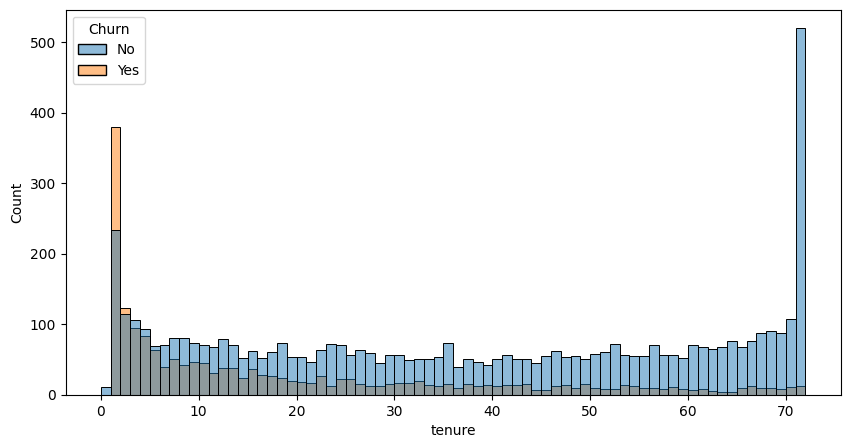

In [16]:
plt.figure(figsize = (10,5))
sns.histplot(x = "tenure", data = dataset, bins = 72, hue = "Churn")
plt.show()
#this histogram shows that most people churned in the very initial months of getting the services

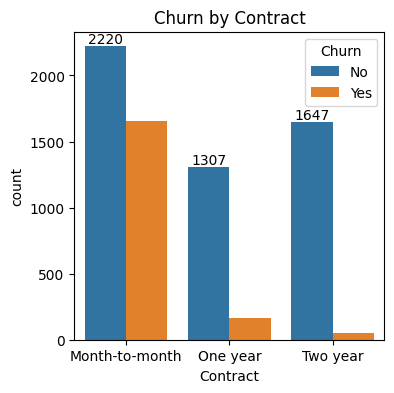

In [17]:
plt.figure(figsize = (4,4))

ax = sns.countplot(x = "Contract", data = dataset, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn by Contract")
plt.show()
#people who have month to month contract are likely to churn than from those who have 1 or 2 years of contract

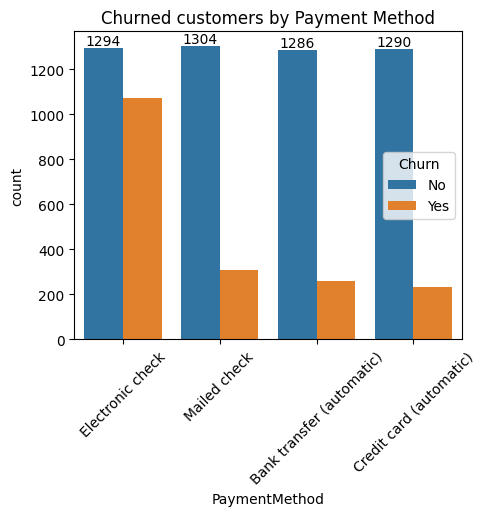

In [23]:
plt.figure(figsize = (5,4))

ax = sns.countplot(x = "PaymentMethod", data = dataset, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Churned customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

#Customer is likely to churn if he is paying via Electronic check as compared to other payment methods